# Advanced Numerical Methods for Data Science

### 1st Assignment (2021-2022)

### Jingye Qian (100384773)

Generate random data from a predefined linear regression model. In particular, consider that $0 \leq \beta_i \leq 5$ $i = 0, \dots, K$ are integer with at least $K = 1000$ independent variables $X = (X_1, X_3,\ldots,X_K)$ and $n = 5000$ observations. We seek to adjust a multiple linear regression model to explain variable $Y$ as a function of the other variables $X$,i.e., $(Y = \beta^{'}X + \epsilon)$ by using “Ridge Regression” under a least-squares approach:

$$\min_{\beta} \quad \left \| y-X\beta \right\|_2^2 + \rho \left \|\beta \right\|_2^2$$

where $\rho$ is a parameter of your election (for instance consider $\rho= 5$).


In [2]:
# installation
!pip install numpy
!pip install scipy

You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.


In [20]:
# importing
import matplotlib.pyplot as plt
import numpy as np

In [21]:
np.random.seed(1234)
# const
K = 1000 # the dimension of X
N = 50000 # the size of dataset
# create random dataset
X0_s = np.ones([N,1]) # the first column has all values equal to one for the coefficients of beta_0
X1_s = np.random.uniform(0,1,([N,K]))
X = np.concatenate([X0_s, X1_s],axis=1)
beta = np.random.randint(0,5,size=K+1)
## Values for the normal errors

error_s = np.random.normal(0,1,N)

## Values for the y's

Y = np.dot(X,beta) + error_s
rho = 5

# a) 

Estimate the value of the regression coefficients by implementing the analytical solution. Use this solution as a benchmark for the following sections.

In order to solve the following objective function:
$$
\begin{align*}
  \text{minimize}_\beta \quad & \|y-X\beta\|_2^2 + \rho \| \beta \|_2^2
\end{align*}
$$

we can derive its explicit solution $\beta_{ls}=(X^T X + \rho)^{-1}X^T y$


In [22]:
from numpy.linalg import inv
beta_ridge_exact = inv(X.T @ X + rho * np.identity(K+1)) @ X.T @ Y

# b)
Estimate the value of the regression coefficients by using the function minimize from the Python module **Scipy.optimize**. Try at least four available solvers and compare their performance in terms of number of iterations, number of function, gradient and hessian evaluations as well as total computational time.

In [23]:
from scipy.optimize import minimize
from scipy.optimize import Bounds
import time

def rigid_reg(beta_ls, X, Y, rho):
    z = Y - X @ beta_ls
    return np.dot(z,z) + rho * np.dot(beta_ls, beta_ls)

### i. L-BFGS-B Method

In [6]:
beta0 = np.zeros(K+1)
start_time = time.process_time()
res = minimize(rigid_reg, beta0, args=(X, Y, rho),  method='L-BFGS-B', options={'disp': True, 'maxiter': 200})
end_time = time.process_time()
print('Training time: %f s' %(end_time - start_time))
print(res)
err_val_1 = np.linalg.norm(beta_ridge_exact.T-res.x,ord=2)/np.linalg.norm(beta_ridge_exact.T,ord=2)
print('\nError in values of coefficients = %8.4f' %err_val_1)

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         1001     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.12290D+10    |proj g|=  1.01197D+08

At iterate    1    f=  2.30855D+10    |proj g|=  6.79256D+07

At iterate    2    f=  8.46824D+06    |proj g|=  2.16220D+04

At iterate    3    f=  8.35729D+06    |proj g|=  4.22129D+04

At iterate    4    f=  7.42987D+06    |proj g|=  2.50162D+05

At iterate    5    f=  5.75947D+06    |proj g|=  4.57184D+05

At iterate    6    f=  3.11316D+06    |proj g|=  5.59989D+05

At iterate    7    f=  1.00107D+06    |proj g|=  3.80579D+05

At iterate    8    f=  3.08155D+05    |proj g|=  1.11224D+05

At iterate    9    f=  2.36789D+05    |proj g|=  9.89501D+03

At iterate   10    f=  2.34457D+05    |proj g|=  5.15463D+03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

### ii. Scalar function of one or more variables using Sequential Least Squares Programming (SLSQP)

In [16]:
beta0 = np.zeros(K+1)
start_time = time.process_time()
res = minimize(rigid_reg, beta0, args=(X, Y, rho),  method='SLSQP', options={'disp': True, 'maxiter': 200})
end_time = time.process_time()
print('Training time: %f s' %(end_time - start_time))
print('(This is a processing time which can be larger than actually wall time when using multiple cores)')
print(res)
err_val_1 = np.linalg.norm(beta_ridge_exact.T-res.x,ord=2)/np.linalg.norm(beta_ridge_exact.T,ord=2)
print('\nError in values of coefficients = %8.4f' %err_val_1)

Optimization terminated successfully    (Exit mode 0)
            Current function value: 79579.89790269443
            Iterations: 19
            Function evaluations: 19115
            Gradient evaluations: 19
Training time: 763.696749 s
(This is a processing time which can be larger than actually wall time when using multiple cores)
     fun: 79579.89790269443
     jac: array([0.07324219, 0.02148438, 0.04101562, ..., 0.0078125 , 0.04003906,
       0.05078125])
 message: 'Optimization terminated successfully'
    nfev: 19115
     nit: 19
    njev: 19
  status: 0
 success: True
       x: array([ 3.36452838, -0.0134765 ,  1.9753466 , ...,  0.00517557,
        3.00802566,  3.99427977])

Error in values of coefficients =   0.0000


##### Outputs
Current function value: 79579.8979

Iterations: 19

Function evaluations: 19115

Gradient evaluations: 19

Training time: 763.696749 s

Error in values of coefficients =   0.0000

### iii. trust-constr algorithm

In [28]:
beta0 = np.zeros(K+1)
start_time = time.process_time()
res = minimize(rigid_reg, beta0, args=(X, Y, rho),  method='trust-constr', options={'disp': True,'maxiter': 50})
end_time = time.process_time()
print('Training time: %f s' %(end_time - start_time))
print('(This is a processing time which can be larger than actually wall time when using multiple cores)')
err_val_1 = np.linalg.norm(beta_ridge_exact.T-res.x,ord=2)/np.linalg.norm(beta_ridge_exact.T,ord=2)
print('\nError in values of coefficients = %8.4f' %err_val_1)
print(res)

The maximum number of function evaluations is exceeded.
Number of iterations: 50, function evaluations: 50100, CG iterations: 219, optimality: 2.68e+01, constraint violation: 0.00e+00, execution time: 1.2e+03 s.
Training time: 9649.422581 s
(This is a processing time which can be larger than actually wall time when using multiple cores)

Error in values of coefficients =   0.0086
         cg_niter: 219
     cg_stop_cond: 4
           constr: []
      constr_nfev: []
      constr_nhev: []
      constr_njev: []
   constr_penalty: 1.0
 constr_violation: 0
   execution_time: 1214.252665758133
              fun: 79590.3006205051
             grad: array([26.77944139,  2.59863281,  7.71283325, ..., -1.58496094,
        0.18772661, -0.05111201])
              jac: []
  lagrangian_grad: array([26.77944139,  2.59863281,  7.71283325, ..., -1.58496094,
        0.18772661, -0.05111201])
          message: 'The maximum number of function evaluations is exceeded.'
           method: 'equality_constr

### iv. Constrained Optimization BY Linear Approximation

In [29]:
beta0 = np.zeros(K+1)
start_time = time.process_time()
res = minimize(rigid_reg, beta0, args=(X, Y, rho),  method='COBYLA', options={'disp': True, 'maxiter': 3000})
end_time = time.process_time()
print('Training time: %f s' %(end_time - start_time))
print('(This is a processing time which can be larger than actually wall time when using multiple cores)')
                                                                                                                                                                                                                                        
err_val_1 = np.linalg.norm(beta_ridge_exact.T-res.x,ord=2)/np.linalg.norm(beta_ridge_exact.T,ord=2)
print('\nError in values of coefficients = %8.4f' %err_val_1)
print(res)

Training time: 4762.310761 s
(This is a processing time which can be larger than actually wall time when using multiple cores)

Error in values of coefficients =   0.5187
     fun: 6962741.506909741
   maxcv: 0.0
 message: 'Maximum number of function evaluations has been exceeded.'
    nfev: 3000
  status: 2
 success: False
       x: array([2.19162562, 0.69796924, 2.11244685, ..., 2.04277469, 1.68818102,
       2.3889282 ])


As we can see from the result, the method SLSQP has the best performance. It converges in 19 iterations and the beta error is almost 0.

From the results using the Nelder-Mead method, its training time is 149.75s, the number of iterations is xxx, the number of functions is ccc, gradient and hessian evaluation

The method L-BFGS-B stops because of it limits the maximum evaluation numbers. The final beta error is 0.0808.

In order to shorten the training time of COBYLA, Nelder-Mead, we set the maximum iteration as 5000. The final beta errors are . The training times are

# c)
Modify the preceding optimization model by adding (lower and upper) bounds on the values of the $\beta$ coefficients. Solve it again with the module **Scipy.optimize** a by using at least two different solvers, which should accpet the introduction of bounds on the variabels. Compare these methods and briefly comments on possible interpretations of the values of the coefficients.

### L-BFGS-B with bounds

In [30]:
# with bounds
beta0 = np.zeros(K+1)
start_time = time.process_time()
res = minimize(rigid_reg, beta0, args=(X, Y, rho),  method='L-BFGS-B', bounds = Bounds(lb = 0.0, ub= 5.0 ), options={'disp': True})
end_time = time.process_time()
print('Elapsed time: %8.5f' %(end_time - start_time))
print('(This is a processing time which can be larger than actually wall time when using multiple cores)')
err_val_1 = np.linalg.norm(beta_ridge_exact.T-res.x,ord=2)/np.linalg.norm(beta_ridge_exact.T,ord=2)
print('\nError in values of coefficients = %8.4f\n' %err_val_1)
print(res)

Elapsed time: 2813.32138
(This is a processing time which can be larger than actually wall time when using multiple cores)

Error in values of coefficients =   0.0209

      fun: 88081.86105689235
 hess_inv: <1001x1001 LbfgsInvHessProduct with dtype=float64>
      jac: array([31776.90688275, 16094.87226242, 16206.42443258, ...,
       15907.74481883, 16171.71811455, 15923.13938673])
  message: 'STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT'
     nfev: 15030
      nit: 8
     njev: 15
   status: 1
  success: False
        x: array([2.03223683e+00, 3.80236985e-03, 2.01259602e+00, ...,
       0.00000000e+00, 3.04176802e+00, 4.00100285e+00])


### trust-constr with bounds

In [27]:
# with bounds
beta0 = np.zeros(K+1)
start_time = time.process_time()
res = minimize(rigid_reg, beta0, args=(X, Y, rho),  method='trust-constr', bounds = Bounds(lb = 0.0, ub= 5.0), options={'disp': True, 'maxiter': 50})
end_time = time.process_time()
print('Elapsed time: %8.5f' %(end_time - start_time))
print('(This is a processing time which can be larger than actually wall time when using multiple cores)')

err_val_1 = np.linalg.norm(beta_ridge_exact.T-res.x,ord=2)/np.linalg.norm(beta_ridge_exact.T,ord=2)
print('\nError in values of coefficients = %8.4f\n' %err_val_1)
print(res)

The maximum number of function evaluations is exceeded.
Number of iterations: 50, function evaluations: 50100, CG iterations: 4064, optimality: 3.78e+03, constraint violation: 0.00e+00, execution time: 1.2e+03 s.
Elapsed time: 9857.63133
(This is a processing time which can be larger than actually wall time when using multiple cores)

Error in values of coefficients =   0.0807



We implemented the algorithms L-BFGS-B and trust-constr. By comparing their training time and the final coefficient errors, we found that L-BFGS-B is a better method for optimization in such problem. It has less training and converges faster.

# d)
Estimate the value of the regression coefficients of (1) by implementing the: *

1. **Gradient** Method 
2. **Newton** method 
3. **Quasi-Newton** method

Consider a line search technique to improve the algorithm convergence, e.x., Armijo rule. Compare the performance of these algorithms (number of iterations, function, gradient and hessian evaluations, and total computational time).


## i. Gradient Decent Method

From an initial iterate $x_0$. When at iteration $k$, the gradient descent can be considered as
$$x_{k+1} = x_k + \alpha_k\ p_k$$

where descent directions $p_k=-\nabla f(x_k)$. Until convergence to a local solution.


In [21]:
# Definition of the OF

def ridge_reg(beta_ridge, X, Y):
    # beta_ridge has the dimension of (K+1,)
    # X has the dimension of (N, K+1)
    # Y has the dimenstion of (N, )
    z = Y - X @ beta_ridge
    return np.dot(z.T,z) + rho * np.dot(beta_ridge.T, beta_ridge)

# Definition of the gradient

def ridge_reg_der(beta_ridge,X,Y):
    # beta_ridge has the dimension of (K+1,)
    # X has the dimension of (N, K+1)
    # Y has the dimenstion of (N, )

    pp = -2*np.dot((Y - X @ beta_ridge).T,X)
    aa = pp.squeeze() + 2 * rho * beta_ridge
    return aa

# Definition of the hessian matrix

def ridge_reg_hess(beta_ls,X,Y):
    # beta_ridge has the dimension of (K+1,)
    # X has the dimension of (N, K+1)
    # Y has the dimenstion of (N, )
    ss = 2*np.dot(X.T,X) + 2 * rho
    return ss

In [22]:
# Implementation of the gradient method

(a,b) = X.shape

## Parameters for the algorithm
sigma = 0.3
alpha = 1e-6
delta = 0.5
n_iter = 1000 # Maximum number of iterations
epsilon = 1e-5
tol = 10000

## Initial values for the variables and data containers

beta_ridge = np.zeros(b) # initial value for beta

OF_iter = np.zeros(n_iter)
tol_iter = np.zeros(n_iter)
alpha_iter = np.zeros(n_iter)

# Implement the gradient method

time_start = time.process_time()

i = 0

while (i <= n_iter-2) and (tol > epsilon):
    i = i + 1
    grad = ridge_reg_der(beta_ridge,X,Y) # Gradient vector
    ddirect = -grad # Descent direction
##### Armijo rule to adjust alpha ######
    alpha=1e-5
    while rigid_reg(beta_ridge + alpha * ddirect, X, Y, rho) > rigid_reg(beta_ridge, X, Y, rho)+alpha*sigma*np.dot(ddirect, grad):
        alpha = alpha*delta
#########################################
    beta_ridge = beta_ridge + alpha*ddirect

    OF_iter[i] = rigid_reg(beta_ridge, X, Y, rho)
    tol = np.linalg.norm(grad,ord=2)
    tol_iter[i] = tol
    alpha_iter[i] = alpha

time_elapsed = (time.process_time() - time_start)

## Print the results

print('Elapsed time = %8.5f' %(time_elapsed))
print('(This is a processing time which can be larger than actually wall time when using multiple cores)')
print('\nNumber of iterations = %5.0f' %i)
print('Objective function   = %11.5f' %OF_iter[i])
print('Optimality tolerance = %11.5f' %tol)

beta_err = np.linalg.norm(np.transpose(beta_ridge_exact)-beta_ridge,ord=2)/np.linalg.norm(beta_ridge,ord=2)
print('\nBeta coefficient error = %10.5f' %beta_err)

Elapsed time = 592.18470
(This is a processing time which can be larger than actually wall time when using multiple cores)

Number of iterations =   999
Objective function   = 79588.27579
Optimality tolerance =    27.77532

Beta coefficient error =    0.00806


##### Output
Elapsed time = 592.18470 (This is a processing time which can be larger than actually wall time when using multiple cores)

Number of iterations =   999

Objective function   = 79588.27579

Optimality tolerance =    27.77532

Beta coefficient error =    0.00806

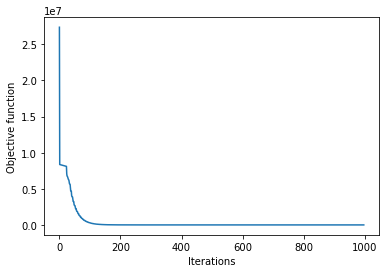

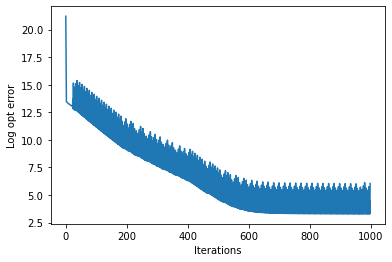

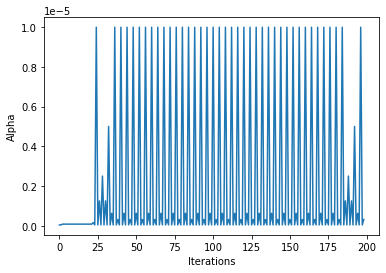

In [23]:
# Plot results showing the evolution of the algorithm

%matplotlib inline
plt.plot(OF_iter[1:i]),plt.ylabel('Objective function'),plt.xlabel('Iterations')
plt.show()

plt.plot(np.log(tol_iter[1:i])),plt.ylabel('Log opt error'),plt.xlabel('Iterations')
plt.show()

plt.plot(alpha_iter[1:200]),plt.ylabel('Alpha'),plt.xlabel('Iterations')
plt.show()

## ii. Newton's method

The iteration is given by:
$$x_{k+1} = x_k + \alpha_k\ p_k$$
where the positive scalar $\alpha_k)$ is called the step length $(\alpha_k>0)$. The success of a line search method depends on effective choices of both the direction $p_k$ and the step length $\alpha_k$. And compute a descent direction $p_k=-(\nabla^2 f(x_k))^{-1} \nabla f(x_k)$, whenever $\nabla^2 f(x_k)$ is a nonsingular matrix. 

In [24]:
# Implementation of Newton's method

(a,b) = X.shape

## Parameters for the algorithm

alpha = 1e-4
n_iter = 200 # Maximum number of iterations
epsilon = 1e-5
tol = 10000
sigma = 0.1
delta = 0.1

## Initial values for the variables and data containers

beta_lsn = np.zeros(b) # initial value for beta

OF_iter = np.zeros(n_iter)
tol_iter = np.zeros(n_iter)
alpha_iter = np.zeros(n_iter)

# Implement Newton's method

time_start = time.process_time()

i = 0

while (i <= n_iter-2) and (tol > epsilon):
    i = i + 1
    grad = ridge_reg_der(beta_lsn,X,Y)
    hess = ridge_reg_hess(beta_lsn,X,Y)
    ddirect = -np.dot(np.linalg.inv(hess),grad) # Descent direction
##### Armijo rule to adjust alpha ######
#########################################
    beta_lsn = beta_lsn + ddirect
    OF_iter[i] = rigid_reg(beta_lsn, X, Y, rho)
    tol = np.linalg.norm(grad,ord=2)
    tol_iter[i] = tol
    alpha_iter[i] = alpha

time_elapsed = (time.process_time() - time_start)

## Print the results

print('Elapsed time = %8.5f' %(time_elapsed))
print('(This is a processing time which can be larger than actually wall time when using multiple cores)')
print('\nNumber of iterations = %5.0f' %i)
print('Objective function   = %11.5f' %OF_iter[i])
print('Optimality tolerance = %11.5f' %tol)

beta_err = np.linalg.norm(np.transpose(beta_ridge_exact)-beta_lsn,ord=2)/np.linalg.norm(beta_lsn,ord=2)
print('\nBeta coefficient error = %10.5f' %beta_err)

Elapsed time = 30.44542
(This is a processing time which can be larger than actually wall time when using multiple cores)

Number of iterations =     8
Objective function   = 79579.89788
Optimality tolerance =     0.00000

Beta coefficient error =    0.00000


##### Output
Elapsed time = 30.44542

Number of iterations = 8

Objective function  = 79579.89788

Optimality tolerance = 0.00

Beta coefficient error = 0.00

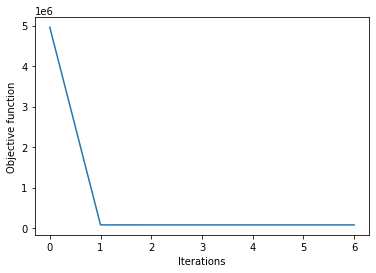

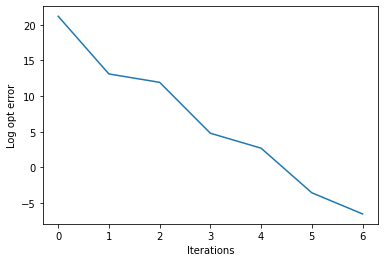

In [25]:
# Plot results showing the evolution of the algorithm

plt.plot(OF_iter[1:i]),plt.ylabel('Objective function'),plt.xlabel('Iterations')
plt.show()

plt.plot(np.log(tol_iter[1:i])),plt.ylabel('Log opt error'),plt.xlabel('Iterations')
plt.show()

## iii. Quasi-Newton Method

$$x_{k+1} = x_k + \alpha_k\ p_k$$
where $p_k=-(B_k)^{-1} \nabla f(x_k)$. As an alternative to Newton's method, $B_k$ is an approximation to the Hessian that is updated at every iteration by means of a low-rank formula. 

Therefore, the quasi-Newton method can be considered as
$$x_{k+1} = x_k - \alpha_kH_k\nabla f(x_k)$$
where $H_k$ is an approximation of $(\nabla^2 f(x_k))^{-1}$.

In [26]:
# Quasi-Newton

(a,b) = X.shape

## Parameters for the algorithm
sigma_1 = 0.001
sigma_2 = 0.9
alpha = 1e-6
delta = 0.5
n_iter = 500 # Maximum number of iterations
epsilon = 1e-3
tol = 10000

## Initial values for the variables and data containers

beta_ridge = np.zeros(b) # initial value for beta

OF_iter = np.zeros(n_iter)
tol_iter = np.zeros(n_iter)
alpha_iter = np.zeros(n_iter)

# Implement the quasi-newton method
H = np.identity(K+1)

time_start = time.process_time()

i = 0

while (i <= n_iter-2) and (tol > epsilon):
    i = i + 1
    grad = ridge_reg_der(beta_ridge,X,Y) # Gradient vector
    ddirect = -grad # Descent direction
    p = H @ ddirect
    alpha=1e-4
    # in order to satisfy Wolfe condition
    while rigid_reg(beta_ridge + alpha * p, X, Y, rho) > rigid_reg(beta_ridge, X, Y, rho)+alpha*sigma_1*np.dot(ddirect.T, p):
        alpha = alpha*delta
    beta_ridge_old = beta_ridge
    beta_ridge = beta_ridge + alpha * H @ ddirect
    s = (alpha * H @ ddirect).reshape(-1,1)
    v = (ridge_reg_der(beta_ridge, X ,Y) - ridge_reg_der(beta_ridge_old, X, Y)).reshape(-1,1)
    H = (np.eye(K+1) - (v @ s.T) / (v.T @ s)).T @ H @ (np.eye(K+1) - (v @ s.T) / (v.T @ s)) + (s @ s.T) / (v.T @ s)
    OF_iter[i] = rigid_reg(beta_ridge, X, Y, rho)
    tol = np.linalg.norm(grad,ord=2)
    tol_iter[i] = tol
    alpha_iter[i] = alpha
    if i % 100 == 0:
        print('Iteration %d: Loss = %f' %(i, OF_iter[i]))

time_elapsed = (time.process_time() - time_start)

## Print the results

print('Elapsed time = %8.5f' %(time_elapsed))
print('(This is a processing time which can be larger than actually wall time when using multiple cores)')
print('\nNumber of iterations = %5.0f' %i)
print('Objective function   = %11.5f' %OF_iter[i])
print('Optimality tolerance = %11.5f' %tol)

beta_err = np.linalg.norm(np.transpose(beta_ridge_exact)-beta_ridge,ord=2)/np.linalg.norm(beta_ridge,ord=2)
print('\nBeta coefficient error = %10.5f' %beta_err)

Iteration 100: Loss = 2921371.421936
Iteration 200: Loss = 82378.985171
Iteration 300: Loss = 79583.133374
Iteration 400: Loss = 79579.901133
Elapsed time = 335.51179
(This is a processing time which can be larger than actually wall time when using multiple cores)

Number of iterations =   499
Objective function   = 79579.89789
Optimality tolerance =     0.77524

Beta coefficient error =    0.00000


##### Output
Elapsed time = 335.51179

Number of iterations = 499

Objective function = 79579.89789

Optimality tolerance = 0.77524

Beta coefficient error = 0.00000

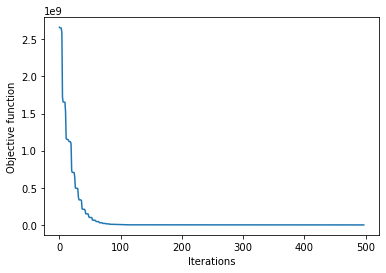

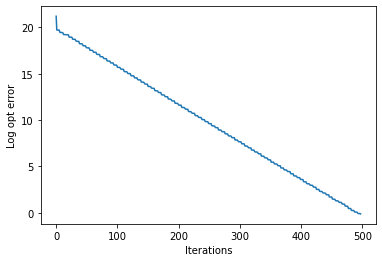

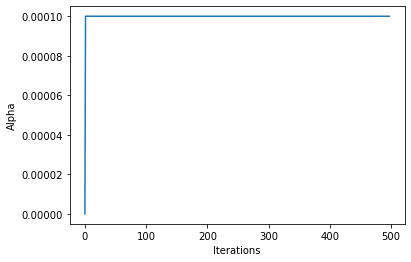

In [27]:
# Plot results showing the evolution of the algorithm

plt.plot(OF_iter[1:i]),plt.ylabel('Objective function'),plt.xlabel('Iterations')
plt.show()

plt.plot(np.log(tol_iter[1:i])),plt.ylabel('Log opt error'),plt.xlabel('Iterations')
plt.show()

plt.plot(alpha_iter[1:i]),plt.ylabel('Alpha'),plt.xlabel('Iterations')
plt.show()

From the performance of each algorithm, we can clearly see that newton method has the best performance. After 8 iterations, the beta_error becomes zero. It has the shortest training time plus the least iteration number.

Quasi-Newtion also has impressive performance. After 500 iterations, the beta error also becomes zero. Because of higher iteration number, it takes more training time compared to Newton Method.

Gradient Decent costs more times and need more iterations for convergence. The beta error is also low after 1000 iterations.



# e)
Estimate the value of the regression coefficients of (1) by implementing the *
1. **Coordinate descent** Method
2. **Stochastic gradient** Method
3. Three other techniques presentaed in Topic 2

Compare the performance of these algorithms (number of iterations, function, gradient and hessian evaluations, and total computational time).


## i. Coordinate descent Method

In [28]:
#Descenso por coordenadas
import time
(a, b) = X.shape

def rigid_reg_der_k(beta_ridge,k, X, Y):
    # beta_ridge has the dimension of (K+1,)
    # X has the dimension of (N, K+1)
    # Y has the dimenstion of (N, )

    pp = -2*np.dot((Y - X @ beta_ridge).T,X[:, k])
    aa = pp.squeeze() + 2 * rho * beta_ridge[k]
    return aa

niter = 30000
epsilon = 1e-9
i = 0
alpha = 1e-4
delta = 0.1
sigma = 0.1
OF_iter_cur = 0
tol_iter = np.zeros(niter)
error_coord_iter = []
tol = 10
beta_coord = np.zeros(b)

time_start = time.time()

while (i < niter) and (tol > epsilon):
    k = np.random.randint(b)
    grad_k = rigid_reg_der_k(beta_coord,k,X,Y)
    grad = np.zeros(b)
    grad[k] = grad_k
    ddirect = -grad
    ##### Armijo rule to adjust alpha ######
    alpha=1e-8
    while rigid_reg(beta_coord + alpha * ddirect, X, Y, rho) > rigid_reg(beta_coord, X, Y, rho)+alpha*sigma*np.dot(ddirect, grad):
        alpha = alpha*delta
    #########################################
    beta_coord = beta_coord + alpha*ddirect
    tol = np.linalg.norm(grad, ord = 2)
    tol_iter[i] = tol
    error_coord_iter.append(np.linalg.norm(np.transpose(beta_ridge_exact) - beta_coord.T, ord = 2)/np.linalg.norm(beta_ridge_exact, ord = 2))
    if i % 100 == 0:
        print('Iteration %d: Beta_err = %f' %(i, error_coord_iter[i]))
    i +=1


time_elapsed = (time.time() - time_start)
print('time elapsed =',time_elapsed)
print('number iterations =',i)
print('tolerance=',tol)
print('error', np.linalg.norm(np.transpose(beta_ridge_exact) - beta_coord.T, ord = 2)/np.linalg.norm(beta_ridge_exact, ord = 2))

Iteration 0: Beta_err = 0.999854
Iteration 100: Beta_err = 0.986415
Iteration 200: Beta_err = 0.972388
Iteration 300: Beta_err = 0.957432
Iteration 400: Beta_err = 0.942761
Iteration 500: Beta_err = 0.931530
Iteration 600: Beta_err = 0.919015
Iteration 700: Beta_err = 0.906416
Iteration 800: Beta_err = 0.895112
Iteration 900: Beta_err = 0.885807
Iteration 1000: Beta_err = 0.875756
Iteration 1100: Beta_err = 0.864703
Iteration 1200: Beta_err = 0.857080
Iteration 1300: Beta_err = 0.846734
Iteration 1400: Beta_err = 0.838506
Iteration 1500: Beta_err = 0.829745
Iteration 1600: Beta_err = 0.821276
Iteration 1700: Beta_err = 0.814143
Iteration 1800: Beta_err = 0.806483
Iteration 1900: Beta_err = 0.798337
Iteration 2000: Beta_err = 0.790294
Iteration 2100: Beta_err = 0.783124
Iteration 2200: Beta_err = 0.774970
Iteration 2300: Beta_err = 0.770557
Iteration 2400: Beta_err = 0.763635
Iteration 2500: Beta_err = 0.759099
Iteration 2600: Beta_err = 0.754214
Iteration 2700: Beta_err = 0.748924
Iter

##### Output

time elapsed = 497.8962

number iterations = 30000

tolerance= 20963.0687

error 0.6291

## ii. Stochastic gradient

In [29]:
def rigid_reg_stoc(beta_ridge, X, Y, subset):
    Xsub = X[subset,:]
    Ysub = Y[subset]
    z = Ysub - Xsub @ beta_ridge
    return np.dot(z.T,z) + rho * np.dot(beta_ridge.T, beta_ridge)

def ridge_reg_der_stoc(beta_ridge,X,Y,subset):
    Xsub = X[subset,:]
    Ysub = Y[subset]

    pp = -2*np.dot((Ysub - Xsub @ beta_ridge).T,Xsub)
    aa = pp.squeeze() + 2 * rho * beta_ridge
    return aa
(a,b)=X.shape
beta_ridge=np.zeros(b) #initial value for beta
alpha=1e-6
n_iter=200000 #maximim number iteration
OF_iter_cur= 0
OF_iter_pre = 0
tol_iter=np.zeros(n_iter)
alpha_iter=np.zeros(n_iter)
error_minib_iter=np.zeros(n_iter)
i=0
sigma = 0.001
#### Number of samples to take into consideration in each iteration
subsetsize = 128


time_start = time.time()

while i <= n_iter-2:
    subset = np.random.choice(N, subsetsize, replace=False)
    grad = ridge_reg_der_stoc(beta_ridge, X, Y, subset)
    ddirect = -grad
    ##### Armijo rule to adjust alpha ######
    alpha=1e-6
    while rigid_reg_stoc(beta_ridge + alpha * ddirect, X, Y, subset) > rigid_reg_stoc(beta_ridge, X, Y,subset)+alpha*sigma*np.dot(ddirect, grad):
        alpha = alpha*delta
    #########################################
    beta_ridge = beta_ridge + alpha * ddirect
    OF_iter_cur = rigid_reg_stoc(beta_ridge, X, Y, subset)
    error_minib_iter[i] = np.linalg.norm(np.transpose(beta_ridge_exact)-beta_ridge,ord=2)/np.linalg.norm(beta_ridge,ord=2)
    if i % 1000 == 0:
        print('Iteration %d: Loss = %f Beta_err = %f' %(i, OF_iter_cur, error_minib_iter[i]))
    i=i+1

time_elapsed = (time.time() - time_start)
print('time elapsed =',time_elapsed)
print('iterations =',i)
print('Objective Function value =', OF_iter_cur)
print('Betas =',beta_ridge)
print('error=',np.linalg.norm(np.transpose(beta_ridge_exact)-beta_ridge,ord=2)/np.linalg.norm(beta_ridge,ord=2))

Iteration 0: Loss = 116318971.289540 Beta_err = 18.046506
Iteration 1000: Loss = 38919.271173 Beta_err = 0.677900
Iteration 2000: Loss = 40378.258758 Beta_err = 0.663517
Iteration 3000: Loss = 37958.953916 Beta_err = 0.649382
Iteration 4000: Loss = 38798.845711 Beta_err = 0.635577
Iteration 5000: Loss = 39524.106081 Beta_err = 0.622131
Iteration 6000: Loss = 34678.389954 Beta_err = 0.609299
Iteration 7000: Loss = 38959.760991 Beta_err = 0.596724
Iteration 8000: Loss = 37641.115704 Beta_err = 0.584029
Iteration 9000: Loss = 38134.681602 Beta_err = 0.572301
Iteration 10000: Loss = 35096.702416 Beta_err = 0.560640
Iteration 11000: Loss = 37115.243530 Beta_err = 0.549395
Iteration 12000: Loss = 33801.959299 Beta_err = 0.538247
Iteration 13000: Loss = 34172.632955 Beta_err = 0.527782
Iteration 14000: Loss = 33470.355045 Beta_err = 0.517426
Iteration 15000: Loss = 38527.285857 Beta_err = 0.507452
Iteration 16000: Loss = 33851.812949 Beta_err = 0.497560
Iteration 17000: Loss = 34351.024432 Be

##### Output

time elapsed = 385.7158

iterations = 199999

Objective Function value = 27443.4871

Betas = [4.04397312 0.6246617  2.00212813 ... 0.63995431 2.72839109 3.37058478]

error= 0.2025


## iii. Others Techniques
We will use three other techniques presented in Topic 2 (one from each category: "noise reduction", "second-order" and "others" mothods).

### Noise Reduction
We want to implement Dynamic Sample Size Method.

The key points of this method is to gradually increase the minibatch size.


In [33]:

def rigid_reg_stoc(beta_ridge, X, Y, subset):
    Xsub = X[subset,:]
    Ysub = Y[subset]
    z = Ysub - Xsub @ beta_ridge
    return np.dot(z.T,z) + rho * np.dot(beta_ridge.T, beta_ridge)

def ridge_reg_der_stoc(beta_ridge,X,Y,subset):
    Xsub = X[subset,:]
    Ysub = Y[subset]

    pp = -2*np.dot((Ysub - Xsub @ beta_ridge).T,Xsub)
    aa = pp.squeeze() + 2 * rho * beta_ridge
    return aa

(a,b)=X.shape
beta_ridge=np.zeros(b) #initial value for beta
n_iter=50000 #maximim number iteration
OF_iter_cur = 0
alpha_iter=np.zeros(n_iter)
error_minib_iter=np.zeros(n_iter)
i=0
epsilon=1e-6
delta = 0.2
tau = 1.0001
subsetsize = 1


time_start = time.process_time()

while i <= n_iter-2:
    #### Number of samples to take into consideration in each iteration

    subsetsize_trunc = min(int(subsetsize),a)
    subset = np.random.choice(N, subsetsize_trunc, replace=False)
    grad = ridge_reg_der_stoc(beta_ridge, X, Y, subset)
    ddirect = -grad
    ##### Armijo rule to adjust alpha ######
    alpha=1e-4
    while rigid_reg_stoc(beta_ridge + alpha * ddirect, X, Y, subset) > rigid_reg_stoc(beta_ridge, X, Y,subset)+alpha*sigma*np.dot(ddirect, grad):
        alpha = alpha*delta
    #########################################
    beta_ridge = beta_ridge + alpha * ddirect
    OF_iter_cur = rigid_reg_stoc(beta_ridge, X, Y, subset)
    error_minib_iter[i] = np.linalg.norm(np.transpose(beta_ridge_exact)-beta_ridge,ord=2)/np.linalg.norm(beta_ridge,ord=2)
    if i % 100 == 0:
        print('Iteration %d: Loss = %f, minibatch_size = %d Beta_error = %f' %(i, OF_iter_cur, subsetsize_trunc, error_minib_iter[i]))
    i=i+1
    subsetsize *= tau

time_elapsed = (time.process_time()- time_start)
print('time elapsed =',time_elapsed)
print('iterations =',i)
print('Objective Function value =', OF_iter_cur)
print('Betas =',beta_ridge)
print('error=',np.linalg.norm(np.transpose(beta_ridge_exact)-beta_ridge,ord=2)/np.linalg.norm(beta_ridge,ord=2))

Iteration 0: Loss = 885418.441631, minibatch_size = 1 Beta_error = 20.579097
Iteration 100: Loss = 20505.010045, minibatch_size = 1 Beta_error = 0.711571
Iteration 200: Loss = 20095.059967, minibatch_size = 1 Beta_error = 0.707138
Iteration 300: Loss = 20816.823331, minibatch_size = 1 Beta_error = 0.704871
Iteration 400: Loss = 20128.427125, minibatch_size = 1 Beta_error = 0.703634
Iteration 500: Loss = 19985.094797, minibatch_size = 1 Beta_error = 0.702609
Iteration 600: Loss = 20031.962290, minibatch_size = 1 Beta_error = 0.701416
Iteration 700: Loss = 20582.471503, minibatch_size = 1 Beta_error = 0.702310
Iteration 800: Loss = 19915.223970, minibatch_size = 1 Beta_error = 0.700826
Iteration 900: Loss = 20320.720233, minibatch_size = 1 Beta_error = 0.699990
Iteration 1000: Loss = 21770.502581, minibatch_size = 1 Beta_error = 0.700221
Iteration 1100: Loss = 20239.062858, minibatch_size = 1 Beta_error = 0.701868
Iteration 1200: Loss = 20596.770052, minibatch_size = 1 Beta_error = 0.697

##### Output

time elapsed = 142.9343

iterations = 49999

Objective Function value = 27641.6926

Betas = [4.03963607 0.63042247 1.9857949  ... 0.60892035 2.73170357 3.40028992]

error= 0.1950

### Second Order Methods: Stochastic Quasi-Newton

In [34]:
# Stochastic-Quasi-Newton
def rigid_reg_stoc(beta_ridge, X, Y, subset):
    Xsub = X[subset,:]
    Ysub = Y[subset]
    z = Ysub - Xsub @ beta_ridge
    return np.dot(z.T,z) + rho * np.dot(beta_ridge.T, beta_ridge)

def ridge_reg_der_stoc(beta_ridge,X,Y,subset):
    Xsub = X[subset,:]
    Ysub = Y[subset]

    pp = -2*np.dot((Ysub - Xsub @ beta_ridge).T,Xsub)
    aa = pp.squeeze() + 2 * rho * beta_ridge
    return aa

(a,b) = X.shape

## Parameters for the algorithm
sigma_1 = 0.0001
sigma_2 = 0.9
alpha = 1e-6
delta = 0.1
n_iter = 20000 # Maximum number of iterations
epsilon = 1e-3
tol = 10000

## Initial values for the variables and data containers

beta_ridge = np.zeros(b) # initial value for beta

OF_iter = np.zeros(n_iter)
tol_iter = np.zeros(n_iter)
alpha_iter = np.zeros(n_iter)

# Implement the quasi-newton method
H = np.identity(K+1)

time_start = time.process_time()

i = 0
subsetsize = 512

while (i <= n_iter-2) and (tol > epsilon):
    i = i + 1
    subset = np.random.choice(N, subsetsize, replace=False)
    grad = ridge_reg_der_stoc(beta_ridge,X,Y, subset) # Gradient vector
    ddirect = -grad # Descent direction
    p = H @ ddirect
    alpha=2e-3
    # in order to satisfy Wolfe condition
    while rigid_reg_stoc(beta_ridge + alpha * p, X, Y, subset) > rigid_reg_stoc(beta_ridge, X, Y, subset)+alpha*sigma_1*np.dot(ddirect.T, p):
        alpha = alpha*delta
    beta_ridge_old = beta_ridge
    beta_ridge = beta_ridge + alpha * H @ ddirect
    s = (alpha * H @ ddirect).reshape(-1,1)
    v = (ridge_reg_der_stoc(beta_ridge, X ,Y, subset) - ridge_reg_der_stoc(beta_ridge_old, X, Y, subset)).reshape(-1,1)
    H = (np.eye(K+1) - (v @ s.T) / (v.T @ s)).T @ H @ (np.eye(K+1) - (v @ s.T) / (v.T @ s)) + (s @ s.T) / (v.T @ s)
    OF_iter[i] = rigid_reg_stoc(beta_ridge, X, Y, subset)
    tol = np.linalg.norm(grad,ord=2)
    tol_iter[i] = tol
    alpha_iter[i] = alpha
    beta_err = np.linalg.norm(np.transpose(beta_ridge_exact)-beta_ridge,ord=2)/np.linalg.norm(beta_ridge,ord=2)
    if i % 100 == 0:
        print('Iteration %d: Loss = %f, Beta_err = %f' %(i, OF_iter[i], beta_err))

time_elapsed = (time.process_time() - time_start)

## Print the results

print('Elapsed time = %8.5f' %(time_elapsed))
print('(This is a processing time which can be larger than actually wall time when using multiple cores)')
print('\nNumber of iterations = %5.0f' %i)
print('Objective function   = %11.5f' %OF_iter[i])
print('Optimality tolerance = %11.5f' %tol)

beta_err = np.linalg.norm(np.transpose(beta_ridge_exact)-beta_ridge,ord=2)/np.linalg.norm(beta_ridge,ord=2)
print('\nBeta coefficient error = %10.5f' %beta_err)

Iteration 100: Loss = 49813207.760760, Beta_err = 0.999357
Iteration 200: Loss = 32354781.270923, Beta_err = 0.996618
Iteration 300: Loss = 62621324.862539, Beta_err = 0.999509
Iteration 400: Loss = 45437746.476829, Beta_err = 0.999403
Iteration 500: Loss = 64256975.941290, Beta_err = 0.999643
Iteration 600: Loss = 47326541.855997, Beta_err = 0.998686
Iteration 700: Loss = 62343045.165941, Beta_err = 0.999261
Iteration 800: Loss = 56567749.487034, Beta_err = 0.999204
Iteration 900: Loss = 48716105.967570, Beta_err = 0.998545
Iteration 1000: Loss = 51907312.449204, Beta_err = 0.998849
Iteration 1100: Loss = 47207404.816663, Beta_err = 0.998975
Iteration 1200: Loss = 44797511.813218, Beta_err = 0.998867
Iteration 1300: Loss = 44892506.594359, Beta_err = 0.998683
Iteration 1400: Loss = 42379488.318770, Beta_err = 0.998170
Iteration 1500: Loss = 30509312.712814, Beta_err = 0.997274
Iteration 1600: Loss = 23290247.369219, Beta_err = 0.995968
Iteration 1700: Loss = 16254896.902405, Beta_err 

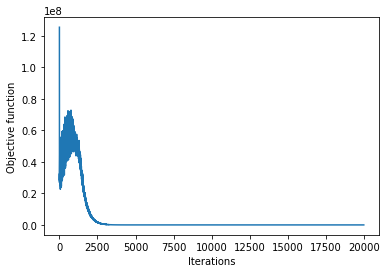

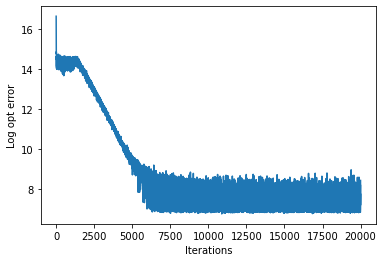

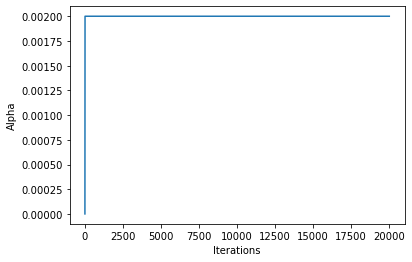

In [35]:
plt.plot(OF_iter[1:i]),plt.ylabel('Objective function'),plt.xlabel('Iterations')
plt.show()

plt.plot(np.log(tol_iter[1:i])),plt.ylabel('Log opt error'),plt.xlabel('Iterations')
plt.show()

plt.plot(alpha_iter[1:i]),plt.ylabel('Alpha'),plt.xlabel('Iterations')
plt.show()

### Others

In [26]:
# Momentum
def rigid_reg_stoc(beta_ridge, X, Y, subset):
    Xsub = X[subset,:]
    Ysub = Y[subset]
    z = Ysub - Xsub @ beta_ridge
    return np.dot(z.T,z) + rho * np.dot(beta_ridge.T, beta_ridge)

def ridge_reg_der_stoc(beta_ridge,X,Y,subset):
    Xsub = X[subset,:]
    Ysub = Y[subset]

    pp = -2*np.dot((Ysub - Xsub @ beta_ridge).T,Xsub)
    aa = pp.squeeze() + 2 * rho * beta_ridge
    return aa
(a,b)=X.shape
beta_ridge_cur=np.zeros(b) #initial value for beta
beta_ridge_pre=np.zeros(b)
alpha=1e-6
n_iter=15000 #maximim number iteration
OF_iter_cur= 0
OF_iter_pre = 0
tol_iter=np.zeros(n_iter)
alpha_iter=np.zeros(n_iter)
error_minib_iter=np.zeros(n_iter)
i=0
sigma = 0.01
#### Number of samples to take into consideration in each iteration
subsetsize = 128
b = 0.1

time_start = time.time()

while i <= n_iter-2:
    subset = np.random.choice(N, subsetsize, replace=False)
    grad = ridge_reg_der_stoc(beta_ridge, X, Y, subset)
    ddirect = -grad
    ##### Armijo rule to adjust alpha ######
    alpha=1e-3
    while rigid_reg_stoc(beta_ridge_cur + alpha * ddirect, X, Y, subset) > rigid_reg_stoc(beta_ridge_cur, X, Y,subset)+alpha*sigma*np.dot(ddirect, grad):
        alpha = alpha*delta
    #########################################
    if i >= 2:
        tmp = beta_ridge_cur
        beta_ridge_cur = beta_ridge_cur + alpha * ddirect + b * (beta_ridge_cur - beta_ridge_pre)
        beta_ridge_pre = beta_ridge_cur
    else:
        tmp = beta_ridge_cur
        beta_ridge_cur = beta_ridge_cur + alpha * ddirect
        beta_ridge_pre = tmp
    OF_iter_cur = rigid_reg(beta_ridge_cur, X, Y, rho)
    error_minib_iter[i] = np.linalg.norm(np.transpose(beta_ridge_exact)-beta_ridge,ord=2)/np.linalg.norm(beta_ridge_cur,ord=2)
    if i % 1000 == 0:
        print('Iteration %d: Loss = %f Beta_err = %f' %(i, OF_iter_cur, error_minib_iter[i]))
    i=i+1

time_elapsed = (time.time() - time_start)
print('time elapsed =',time_elapsed)
print('iterations =',i)
print('Objective Function value =', OF_iter_cur)
print('Betas =',beta_ridge)
print('error=',np.linalg.norm(np.transpose(beta_ridge_exact)-beta_ridge,ord=2)/np.linalg.norm(beta_ridge_cur,ord=2))

Iteration 0: Loss = 49336815033.433037 Beta_err = 5450105906345324.000000
Iteration 1000: Loss = 61233381.187469 Beta_err = 0.076939
Iteration 2000: Loss = 211163899.034345 Beta_err = 0.040059
Iteration 3000: Loss = 488195344.574432 Beta_err = 0.024810
Iteration 4000: Loss = 916256625.570953 Beta_err = 0.017771
Iteration 5000: Loss = 1487372545.386450 Beta_err = 0.013798
Iteration 6000: Loss = 2119446932.126639 Beta_err = 0.011270
Iteration 7000: Loss = 3030202883.493717 Beta_err = 0.009465
Iteration 8000: Loss = 3831900216.111942 Beta_err = 0.008235
Iteration 9000: Loss = 4916422271.294641 Beta_err = 0.007232
Iteration 10000: Loss = 6188965410.356422 Beta_err = 0.006455
Iteration 11000: Loss = 7360393755.820658 Beta_err = 0.005870
Iteration 12000: Loss = 9015728305.520464 Beta_err = 0.005325
Iteration 13000: Loss = 10654768989.530275 Beta_err = 0.004915
Iteration 14000: Loss = 12115031874.155613 Beta_err = 0.004569
time elapsed = 117.80176711082458
iterations = 14999
Objective Functio

### Conclusions
As we can see from the results, the Coordinate descent cannot successfully solve the task since it doesn't converge even after long training time.

The vanilla stochastic gradient has better performance compared to Coordinated descent. The Beta error rate compared to analytic solution of beta is around 0.2. This is the result after trying multiple Hyper-parameters.

We implemented one of the methods in categories noise reduction, second-order and momentum.
1. noise reduction:
We gradually increase the mini-batch size in order to get a faster convergence rate. The result shows that it does converge faster than vanilla stochastic gradient descent, and have smaller beta evaluation error.
2. second-order:
We chose stochastic quasi-newton method. We chose a larger batch size because second-order method is more sensitive to batch size compare to gradient method. If the batch size is chosen too small, it may not converge anymore. The result show that it does converge to a relative small beta evaluation error. However, it needs more iterations and causes more training time.
3. other:
We took momentum as our first choice. The result is much impressive. After around 10000 iterations, it converges to a very low beta error.

# f）
Consider the constrained problem:

\begin{align*}
  \min_\beta \quad & \|y-X\beta\|^2_2 \\
  s.t. \sum_{i=1}^{K} \beta_i \leq 100
\end{align*}

Estimate optimal value of the regression coefficients in (2) by implementing a barrier algorithm.*

*You have to write down the algorithms’ code in Python by yourself.


To optimize the following problem,
\begin{align*}
  \text{minimize}_\beta \quad & \|y-X\beta\|^2_2 \\
  s.t. \sum_{i=1}^{K} \beta_i \leq 100
\end{align*}
we implemented some transformations first. We will get
\begin{align*}
  \text{minimize}_\beta \quad & \|y-X\beta\|^2_2 \\
  s.t. 100 - \sum_{i=1}^{K} \beta_i \geq 0
\end{align*}
After apply barrier algorithm, the above optimization problem can be approximately seen as the following unconstraint problem:
\begin{align*}
  \text{minimize}_\beta \quad & \|y-X\beta\|^2_2 - \mu log (100 - \sum_{i=1}^{K} \beta_i)\\
\end{align*}

In [27]:
mu = 100 # Hyper parameters
def reg(beta, X, Y):
    z = Y - X @ beta
    return np.dot(z.T,z) - mu * np.log(100 - np.sum(beta))


def reg_der(beta,X,Y):

    pp = -2*np.dot((Y - X @ beta).T,X)
    aa = pp.squeeze() + mu * beta / (100 - np.sum(beta))
    return aa

(a,b)=X.shape
beta_cur=np.zeros(b) #initial value for beta
beta_pre=np.zeros(b)
alpha=1e-8
n_iter=1000 #maximim number iteration
OF_iter_cur= 0
tol_iter=np.zeros(n_iter)
alpha_iter=np.zeros(n_iter)
error_minib_iter=np.zeros(n_iter)
i=0
sigma = 0.01
#### Number of samples to take into consideration in each iteration
subsetsize = 128
b = 0.1

time_start = time.time()

while i <= n_iter-2:
    subset = np.random.choice(N, subsetsize, replace=False)
    grad = reg_der(beta_ridge, X, Y)
    ddirect = -grad
    alpha = 1e-7
    while np.sum(beta_cur + alpha * ddirect) >= 100:
        alpha = alpha * 0.5
    beta_cur = beta_cur + alpha * ddirect
    OF_iter_cur = reg(beta_cur, X, Y)
    # error_minib_iter[i] = np.linalg.norm(np.transpose(beta_ridge_exact)-beta_ridge,ord=2)/np.linalg.norm(beta_ridge_cur,ord=2)
    if i % 100 == 0:
        print('Iteration %d: Loss = %f' %(i, OF_iter_cur))
    i=i+1

time_elapsed = (time.time() - time_start)
print('time elapsed =',time_elapsed)
print('iterations =',i)
print('Objective Function value =', OF_iter_cur)
print('Betas =',beta_cur)
print('Sum of Beta =', np.sum(beta_cur))

Iteration 0: Loss = 49318354002.262154
Iteration 100: Loss = 47489741804.784500
Iteration 200: Loss = 45695673924.900574
Iteration 300: Loss = 44484322303.994850
Iteration 400: Loss = 44484322303.994850
Iteration 500: Loss = 44484322303.994850
Iteration 600: Loss = 44484322303.994850
Iteration 700: Loss = 44484322303.994850
Iteration 800: Loss = 44484322303.994850
Iteration 900: Loss = 44484322303.994850
time elapsed = 19.017818927764893
iterations = 999
Objective Function value = 44484322303.99485
Betas = [0.20036041 0.14182626 0.09994683 ... 0.02891038 0.02814619 0.10249893]
Sum of Beta = 99.99999999999999


The intuition of barrier algorithm is very simple. It leverages that the gradient of log near 0 is quite steep which enforce the condition of the optimization problem satisfies. As we can see from the results, the sum of beta is smaller than 100 after we use barrier algorithm.